In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('data/level1.csv')
df=df.drop(['Unnamed: 0','typrep'],axis=1)
df=df.fillna(0)
df.head()

stkcd      accper    a001000000    a002000000    a003000000    a004000000  \
0      1  1998/12/31  3.939986e+10  3.572350e+10  3.676363e+09  3.939986e+10   
1      1  1999/12/31  4.586897e+10  4.296814e+10  2.900831e+09  4.586897e+10   
2      1  2000/12/31  6.722750e+10  6.248862e+10  4.738884e+09  6.722750e+10   
3      1  2001/12/31  1.200000e+11  1.160000e+11  3.627669e+09  1.200000e+11   
4      1  2002/12/31  1.660000e+11  1.620000e+11  3.768021e+09  1.660000e+11   

     b001100000    b001200000   b001302000   b001300000      ...       \
0  1.758112e+09  1.117254e+09  184826928.9  850582907.6      ...        
1  1.471221e+09  1.119906e+09  233134900.0  606373989.0      ...        
2  1.431286e+09  1.259262e+09  356704292.0  553631449.0      ...        
3  2.118441e+09  2.035716e+09  442490935.0  561748514.0      ...        
4  3.077099e+09  3.120449e+09  631211324.0  649268604.0      ...        

     c003000000  c004000000    c005000000  c005001000  c006000000  \
0 -1.079425e+08    45131.71  1.158301e+08         0.0         0.0   
1 -5.941585e+08    99961.00  2.596769e+09         0.0         0.0   
2  2.827087e+09   -38698.00  1.317816e+09         0.0         0.0   
3 -1.410685e+06  -310743.00  8.787071e+09         0.0         0.0   
4 -2.761487e+08    -1838.00  1.448235e+09         0.0         0.0   

    d000101000    d000100000    d000204000    d000205000    d000200000  
0  764240100.0  2.291098e+09  5.164142e+08  4.005841e+08  1.158301e+08  
1  555191092.0  4.671594e+09  6.326918e+09  3.730149e+09  2.596769e+09  
2  506551785.0  1.591065e+09  3.818351e+08  8.226618e+08  1.317816e+09  
3  402360428.0  1.464214e+10  0.000000e+00  0.000000e+00  8.787071e+09  
4  432224930.0  8.544036e+09  5.152195e+08  3.793129e+08  1.448235e+09  

[5 rows x 29 columns]

# 利润总额频数分布

In [70]:
print(df['b001000000'].max())
print(df['b001000000'].min())
print(df['b001000000'].mean())
print(df['b001000000'].std())

372000000000.0
-17461729524.0
861842112.08115
8965535479.062717


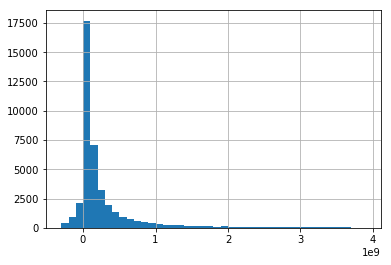

In [71]:
df['b001000000'].hist(bins=range(-300000000,4000000000,100000000))

# Normalize

In [72]:
cols = df.columns
normlist=[]
for col in cols:
    # print(df[col].dtype)
    if str(df[col].dtype) == 'float64':
        normlist.append(col)
print(len(normlist))

27


In [73]:
mean=[]
std=[]
for i,name in enumerate(normlist):
    mean.append(df[name].mean())
    std.append(df[name].std())
    df[name] = (df[name]-df[name].mean())/(df[name].std())

In [74]:
max_v=[]
min_v=[]
for i,name in enumerate(normlist):
    max_v.append(df[name].max())
    min_v.append(df[name].min())

# Normalize 之后利润总额的频数分布

In [75]:
print(df['b001300000'].max())
print(df['b001300000'].min())
print(df['b001300000'].mean())
print(df['b001300000'].std())

41.537851467786346
-3.0183222066726967
-7.968889767631208e-18
1.0


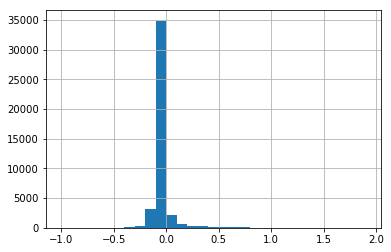

In [76]:
df['b001300000'].hist(bins=[i/10 for i in range(-10,20,1)])

In [77]:
df.head()

stkcd      accper  a001000000  a002000000  a003000000  a004000000  \
0      1  1998/12/31    0.001135    0.005961   -0.050913    0.001135   
1      1  1999/12/31    0.012284    0.019473   -0.066531    0.012284   
2      1  2000/12/31    0.049091    0.055879   -0.029516    0.049091   
3      1  2001/12/31    0.140035    0.155680   -0.051894    0.140035   
4      1  2002/12/31    0.219307    0.241471   -0.049068    0.219307   

   b001100000  b001200000  b001302000  b001300000     ...      c003000000  \
0   -0.101356   -0.108131    0.008129    0.002082     ...       -0.091227   
1   -0.106274   -0.108082    0.028062   -0.025321     ...       -0.174686   
2   -0.106959   -0.105529    0.079050   -0.031240     ...        0.412569   
3   -0.095178   -0.091304    0.114448   -0.030329     ...       -0.072941   
4   -0.078742   -0.071431    0.192319   -0.020508     ...       -0.120100   

   c004000000  c005000000  c005001000  c006000000  d000101000  d000100000  \
0   -0.000933   -0.019685   -0.088064   -0.088407    0.013131    0.053278   
1   -0.000822    0.260917   -0.088064   -0.088407   -0.016732    0.175355   
2   -0.001102    0.116263   -0.088064   -0.088407   -0.023680    0.017379   
3   -0.001650    0.961059   -0.088064   -0.088407   -0.038564    0.686665   
4   -0.001027    0.131014   -0.088064   -0.088407   -0.034298    0.373942   

   d000204000  d000205000  d000200000  
0   -0.080285   -0.081301   -0.016921  
1    0.243399    0.109454    0.306207  
2   -0.087782   -0.057120    0.139631  
3   -0.109052   -0.104251    1.112457  
4   -0.080351   -0.082520    0.156617  

[5 rows x 29 columns]

In [58]:
stkcd=df['stkcd']
stkcd=np.array(stkcd).tolist()
stkcd=list(set(stkcd))
len(stkcd)

3808

In [59]:
firm=df.groupby('stkcd')

In [87]:
trainX,trainY=[],[]
testX,testY=[],[]
input_length=5
output_length=1
for i,val in enumerate(stkcd):
    f=firm.get_group(val)
    f=f.drop(['stkcd','accper'],axis=1)
    f=f.values
    num=f.shape[0]-input_length-output_length
    if (num>=0):
        testX.append(f[-input_length-output_length:-output_length,:])
        testY.append(f[-output_length:,10])
        for j in range(num):
            trainX.append(f[j:j+input_length,:])
            trainY.append(f[j+input_length:j+input_length+output_length,10])
trainX=np.array(trainX)
trainY=np.array(trainY)
testX=np.array(testX)
testY=np.array(testY)

In [88]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(23448, 5, 27)
(23448, 1)
(2687, 5, 27)
(2687, 1)


In [19]:
dataX,dataY=[],[]
length=[]
input_length=5
output_length=1
for i,val in enumerate(stkcd):
    f=firm.get_group(val)
    f=f.drop(['stkcd','accper'],axis=1)
    f=f.values
    length.append(f.shape[0])
    num=f.shape[0] - input_length-output_length
    if num>=0:
        for j in range(num+1):
            dataX.append(f[j:j+input_length,:])
            dataY.append(np.hstack((f[j+input_length:j+input_length+output_length,4].reshape(3,1),
                                f[j+input_length:j+input_length+output_length,13].reshape(3,1))))
dataX=np.array(dataX)
dataY=np.array(dataY)

In [17]:
dataX.shape

(23253, 5, 35)

In [20]:
dataY.shape

(23253, 3, 2)

(array([784., 375., 764., 358., 104., 244., 335., 506., 270.,  69.]),
 array([ 1. ,  3.8,  6.6,  9.4, 12.2, 15. , 17.8, 20.6, 23.4, 26.2, 29. ]),
 <a list of 10 Patch objects>)

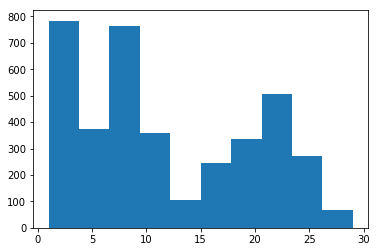

In [30]:
plt.hist(length)

In [14]:
firm=df.groupby('stkcd')

In [15]:
f=firm.get_group(1)
f.head()

stkcd      accper    a001000000    a002000000    a003000000    a004000000  \
0      1  1990/12/31  2.919190e+09  5.628000e+07  2.365100e+08  2.919190e+09   
1      1  1991/12/31  4.354460e+09  7.723000e+07  5.779600e+08  4.354460e+09   
2      1  1992/12/31  7.522847e+09  1.958932e+08  5.456622e+08  7.522847e+09   
3      1  1993/12/31  9.337871e+09  8.148741e+09  1.189130e+09  9.337871e+09   
4      1  1994/12/31  1.548841e+10  1.382858e+10  1.659833e+09  1.548841e+10   

    b001100000   b001200000  b001301000   b001302000     ...      c005000000  \
0          0.0          0.0         0.0         0.00     ...             0.0   
1  334690000.0  188230000.0         0.0   3720000.00     ...             0.0   
2  475510800.0  254612800.0         0.0   4845000.00     ...             0.0   
3  407870596.5  114621987.4         0.0  25120959.95     ...             0.0   
4  662338768.2  323169773.6         0.0  63115202.60     ...             0.0   

   c005001000  c006000000  d000101000  d000100000  d000204000  d000205000  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   d000206000  d000207000  d000200000  
0         0.0         0.0         0.0  
1         0.0         0.0         0.0  
2         0.0         0.0         0.0  
3         0.0         0.0         0.0  
4         0.0         0.0         0.0  

[5 rows x 37 columns]

In [16]:
f=f.drop(['stkcd','accper'],axis=1)
f.head()

a001000000    a002000000    a003000000    a004000000   b001100000  \
0  2.919190e+09  5.628000e+07  2.365100e+08  2.919190e+09          0.0   
1  4.354460e+09  7.723000e+07  5.779600e+08  4.354460e+09  334690000.0   
2  7.522847e+09  1.958932e+08  5.456622e+08  7.522847e+09  475510800.0   
3  9.337871e+09  8.148741e+09  1.189130e+09  9.337871e+09  407870596.5   
4  1.548841e+10  1.382858e+10  1.659833e+09  1.548841e+10  662338768.2   

    b001200000  b001301000   b001302000   b001303000  b001304000     ...      \
0          0.0         0.0         0.00         0.00         0.0     ...       
1  188230000.0         0.0   3720000.00         0.00         0.0     ...       
2  254612800.0         0.0   4845000.00         0.00         0.0     ...       
3  114621987.4         0.0  25120959.95   2092216.00         0.0     ...       
4  323169773.6         0.0  63115202.60  13689998.09         0.0     ...       

   c005000000  c005001000  c006000000  d000101000  d000100000  d000204000  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   d000205000  d000206000  d000207000  d000200000  
0         0.0         0.0         0.0         0.0  
1         0.0         0.0         0.0         0.0  
2         0.0         0.0         0.0         0.0  
3         0.0         0.0         0.0         0.0  
4         0.0         0.0         0.0         0.0  

[5 rows x 35 columns]

In [17]:
f=f.values

In [18]:
print(f.shape)

(29, 35)


In [20]:
f[1:5,:].shape

(4, 35)